### MILESTONE **2**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/kidney_disease.csv")
data.head(n=500)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cell','pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension', 'diabettesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','classification']
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabettesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cell           248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cell             152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabettesmellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [ ]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cell              True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabettesmellitus           True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
classification             False
dtype: bool

In [ ]:
data['age'].fillna(data['age'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mean(),inplace=True)
data['albumin'].fillna(data['albumin'].mean(),inplace=True)
data['sugar'].fillna(data['sugar'].mean(),inplace=True)
data['red_blood_cell'].fillna(data['red_blood_cell'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mode()[0],inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mode()[0],inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['diabettesmellitus'].fillna(data['diabettesmellitus'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabettesmellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [ ]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values) #selecting non numerical columns in the dataset
print(catcols)

{'anemia', 'classification', 'pedal_edema', 'coronary_artery_disease', 'packed_cell_volume', 'bacteria', 'pus_cell', 'pus_cell_clumps', 'white_blood_cell_count', 'red_blood_cell_count', 'appetite', 'hypertension', 'diabettesmellitus', 'red_blood_cell'}


In [ ]:
for i in catcols: 
  print("columns:",i)
  print(c(data[i])) # grouping the data in column
  print('*'*100+'\n')

columns: anemia
Counter({'no': 340, 'yes': 60})
****************************************************************************************************

columns: classification
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
****************************************************************************************************

columns: pedal_edema
Counter({'no': 324, 'yes': 76})
****************************************************************************************************

columns: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
****************************************************************************************************

columns: packed_cell_volume
Counter({'41': 91, '52': 21, '44': 19, '48': 19, '40': 16, '43': 14, '45': 13, '42': 13, '32': 12, '36': 12, '33': 12, '28': 12, '50': 12, '37': 11, '34': 11, '35': 9, '29': 9, '30': 9, '46': 9, '31': 8, '39': 7, '24': 7, '26': 6, '38': 5, '47': 4, '49': 4, '53': 4, '51': 4, '54': 4, '27': 3, '22': 3, '25': 3, '2

In [ ]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
data['diabettesmellitus']=data.diabettesmellitus.replace('\tno','no')
data['diabettesmellitus']=data.diabettesmellitus.replace('\tyes','yes')
data['diabettesmellitus']=data.diabettesmellitus.replace(' yes','yes')
data['classification']=data.classification.replace('ckd\t','ckd')

In [ ]:
# label encoding = convert categorical to numerical eg: yes - 1, no- 0
catcols =['pus_cell', 'hypertension', 'diabettesmellitus', 'anemia', 'coronary_artery_disease', 'red_blood_cell_count', 'appetite', 'packed_cell_volume', 'classification', 'bacteria', 'white_blood_cell_count', 'pus_cell_clumps', 'red_blood_cell', 'pedal_edema']#

In [ ]:
from sklearn.preprocessing import LabelEncoder 
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi= LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])                             
  print(c(data[i]))
  print('*'*100)

LABEL ENCODING OF: pus_cell
Counter({'normal': 324, 'abnormal': 76})
Counter({1: 324, 0: 76})
****************************************************************************************************
LABEL ENCODING OF: hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
LABEL ENCODING OF: diabettesmellitus
Counter({'no': 263, 'yes': 137})
Counter({0: 263, 1: 137})
****************************************************************************************************
LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
****************************************************************************************************
LABEL ENCODING OF: red_blood_ce

In [ ]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'classification', 'coronary_artery_disease', 'packed_cell_volume', 'bacteria', 'pus_cell', 'age', 'serum_creatinine', 'hypertension', 'diabettesmellitus', 'anemia', 'potassium', 'sugar', 'appetite', 'blood_pressure', 'specific_gravity', 'blood_urea', 'hemoglobin', 'white_blood_cell_count', 'red_blood_cell_count', 'albumin', 'red_blood_cell', 'pedal_edema', 'blood_glucose_random', 'pus_cell_clumps', 'sodium', 'id'}


In [ ]:
for i in contcols:
  print("Continuous Column :",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continuous Column : classification
Counter({0: 250, 1: 150})
************************************************************************************************************************

Continuous Column : coronary_artery_disease
Counter({0: 366, 1: 34})
************************************************************************************************************************

Continuous Column : packed_cell_volume
Counter({29: 91, 40: 21, 32: 19, 36: 19, 28: 16, 31: 14, 33: 13, 30: 13, 20: 12, 24: 12, 21: 12, 16: 12, 38: 12, 25: 11, 22: 11, 23: 9, 17: 9, 18: 9, 34: 9, 19: 8, 27: 7, 12: 7, 14: 6, 26: 5, 35: 4, 37: 4, 41: 4, 39: 4, 42: 4, 15: 3, 10: 3, 13: 3, 11: 2, 7: 2, 4: 1, 1: 1, 2: 1, 6: 1, 5: 1, 3: 1, 9: 1, 8: 1, 0: 1, 43: 1})
************************************************************************************************************************

Continuous Column : bacteria
Counter({0: 378, 1: 22})
****************************************************************************************

In [ ]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabettesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,0,0,0,0,0,0


In [ ]:
data.isna().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabettesmellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

# **MILESTONE** **3** 

In [ ]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabettesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,0.882500,0.810000,0.105000,0.055000,...,27.227500,63.905000,29.96250,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,115.614301,16.974966,13.476298,0.005369,1.272318,1.029487,0.322418,0.392792,0.306937,0.228266,...,8.304707,27.643378,9.51538,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,22.000000,49.000000,26.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,29.000000,71.000000,34.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.450142,1.000000,1.000000,0.000000,0.000000,...,32.000000,90.000000,34.00000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,43.000000,91.000000,48.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### **AGE DISTRIBUTON**

<Axes: xlabel='diabettesmellitus', ylabel='Density'>

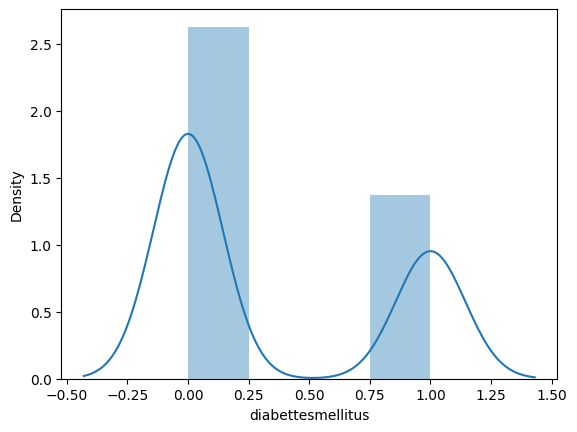

In [ ]:
sns.distplot(data.diabettesmellitus)

# **Age VS** **Diabettesmellitus**

Text(0.5, 1.0, 'age vs diabettesmellitus')

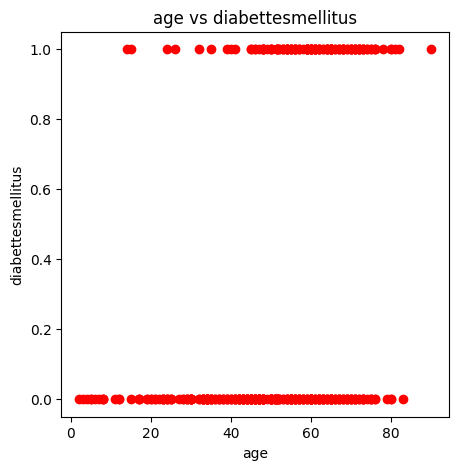

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'], data['diabettesmellitus'], color ='red')
plt.xlabel('age')
plt.ylabel('diabettesmellitus')
plt.title("age vs diabettesmellitus")

# **Age VS all continuous column**

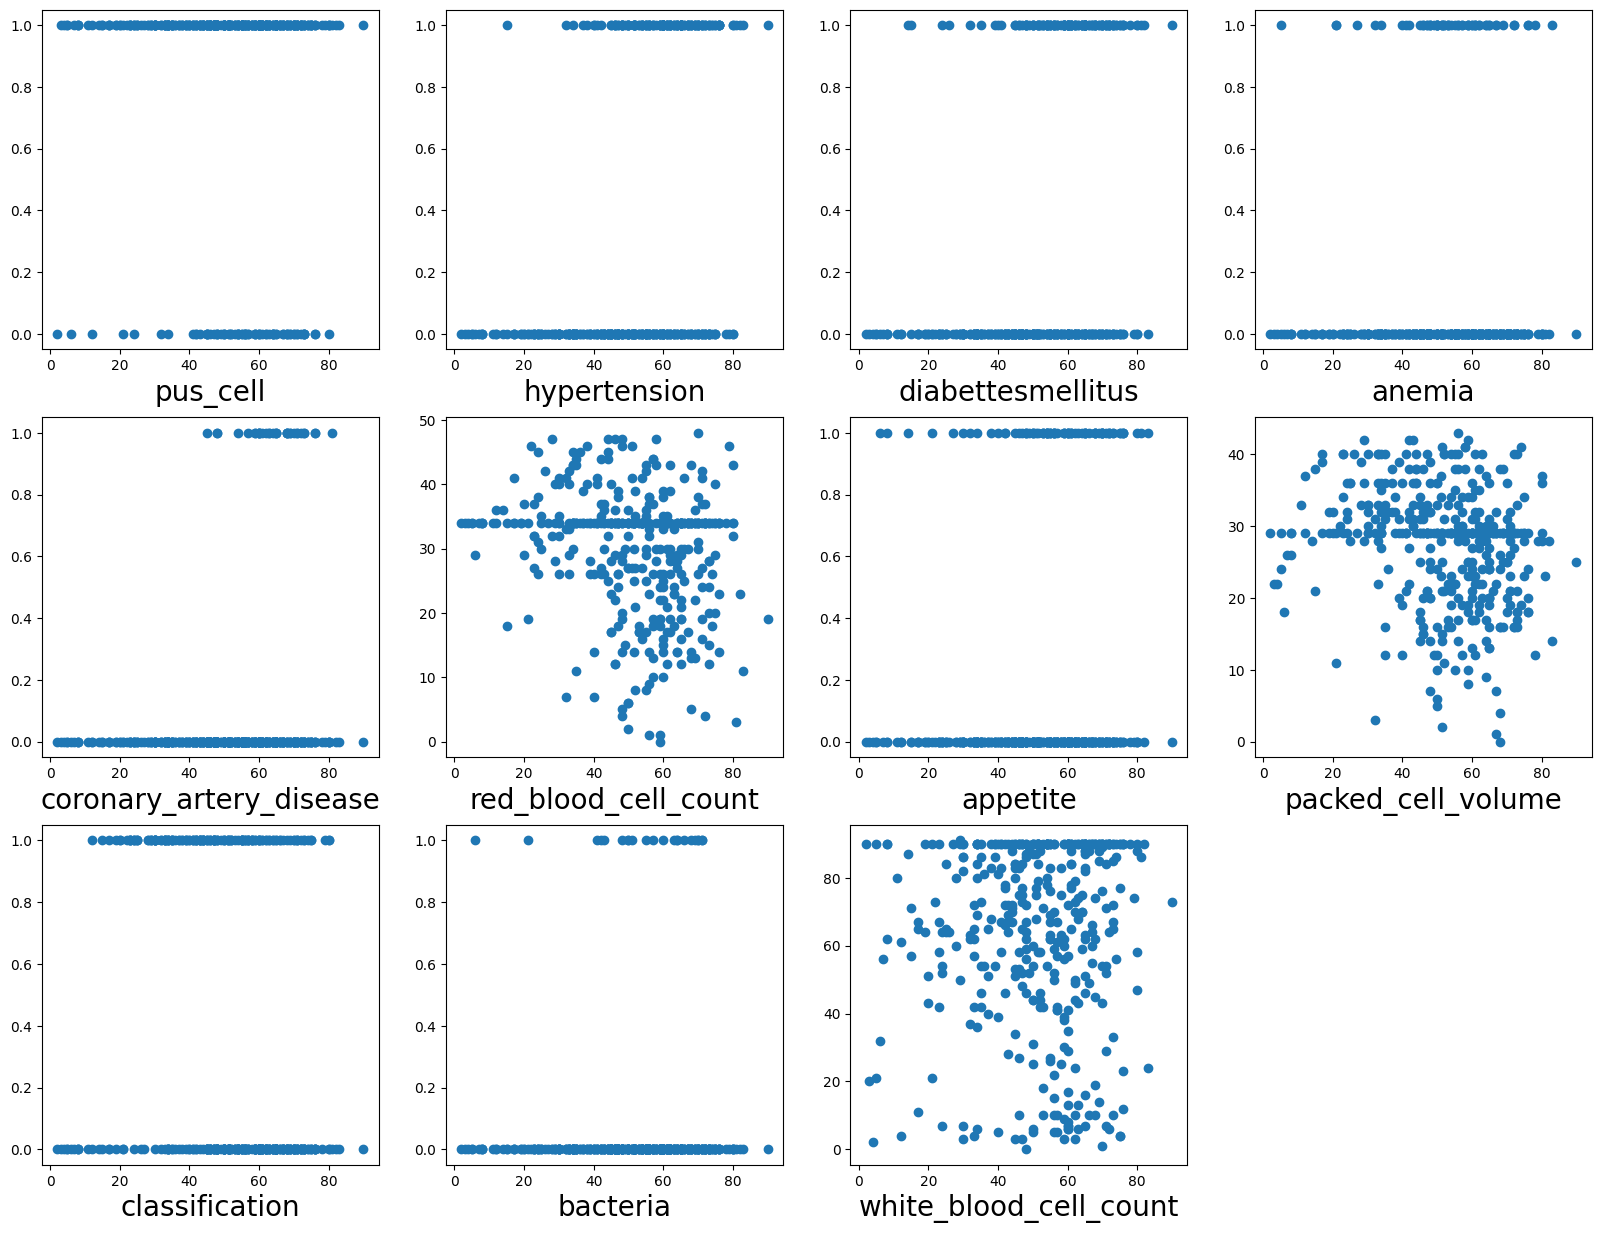

In [ ]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1
for column in catcols:
  if plotnumber<=11:
    ax=plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column, fontsize=20)
  plotnumber+=1
plt.show()

# **HEAT** **MAP**

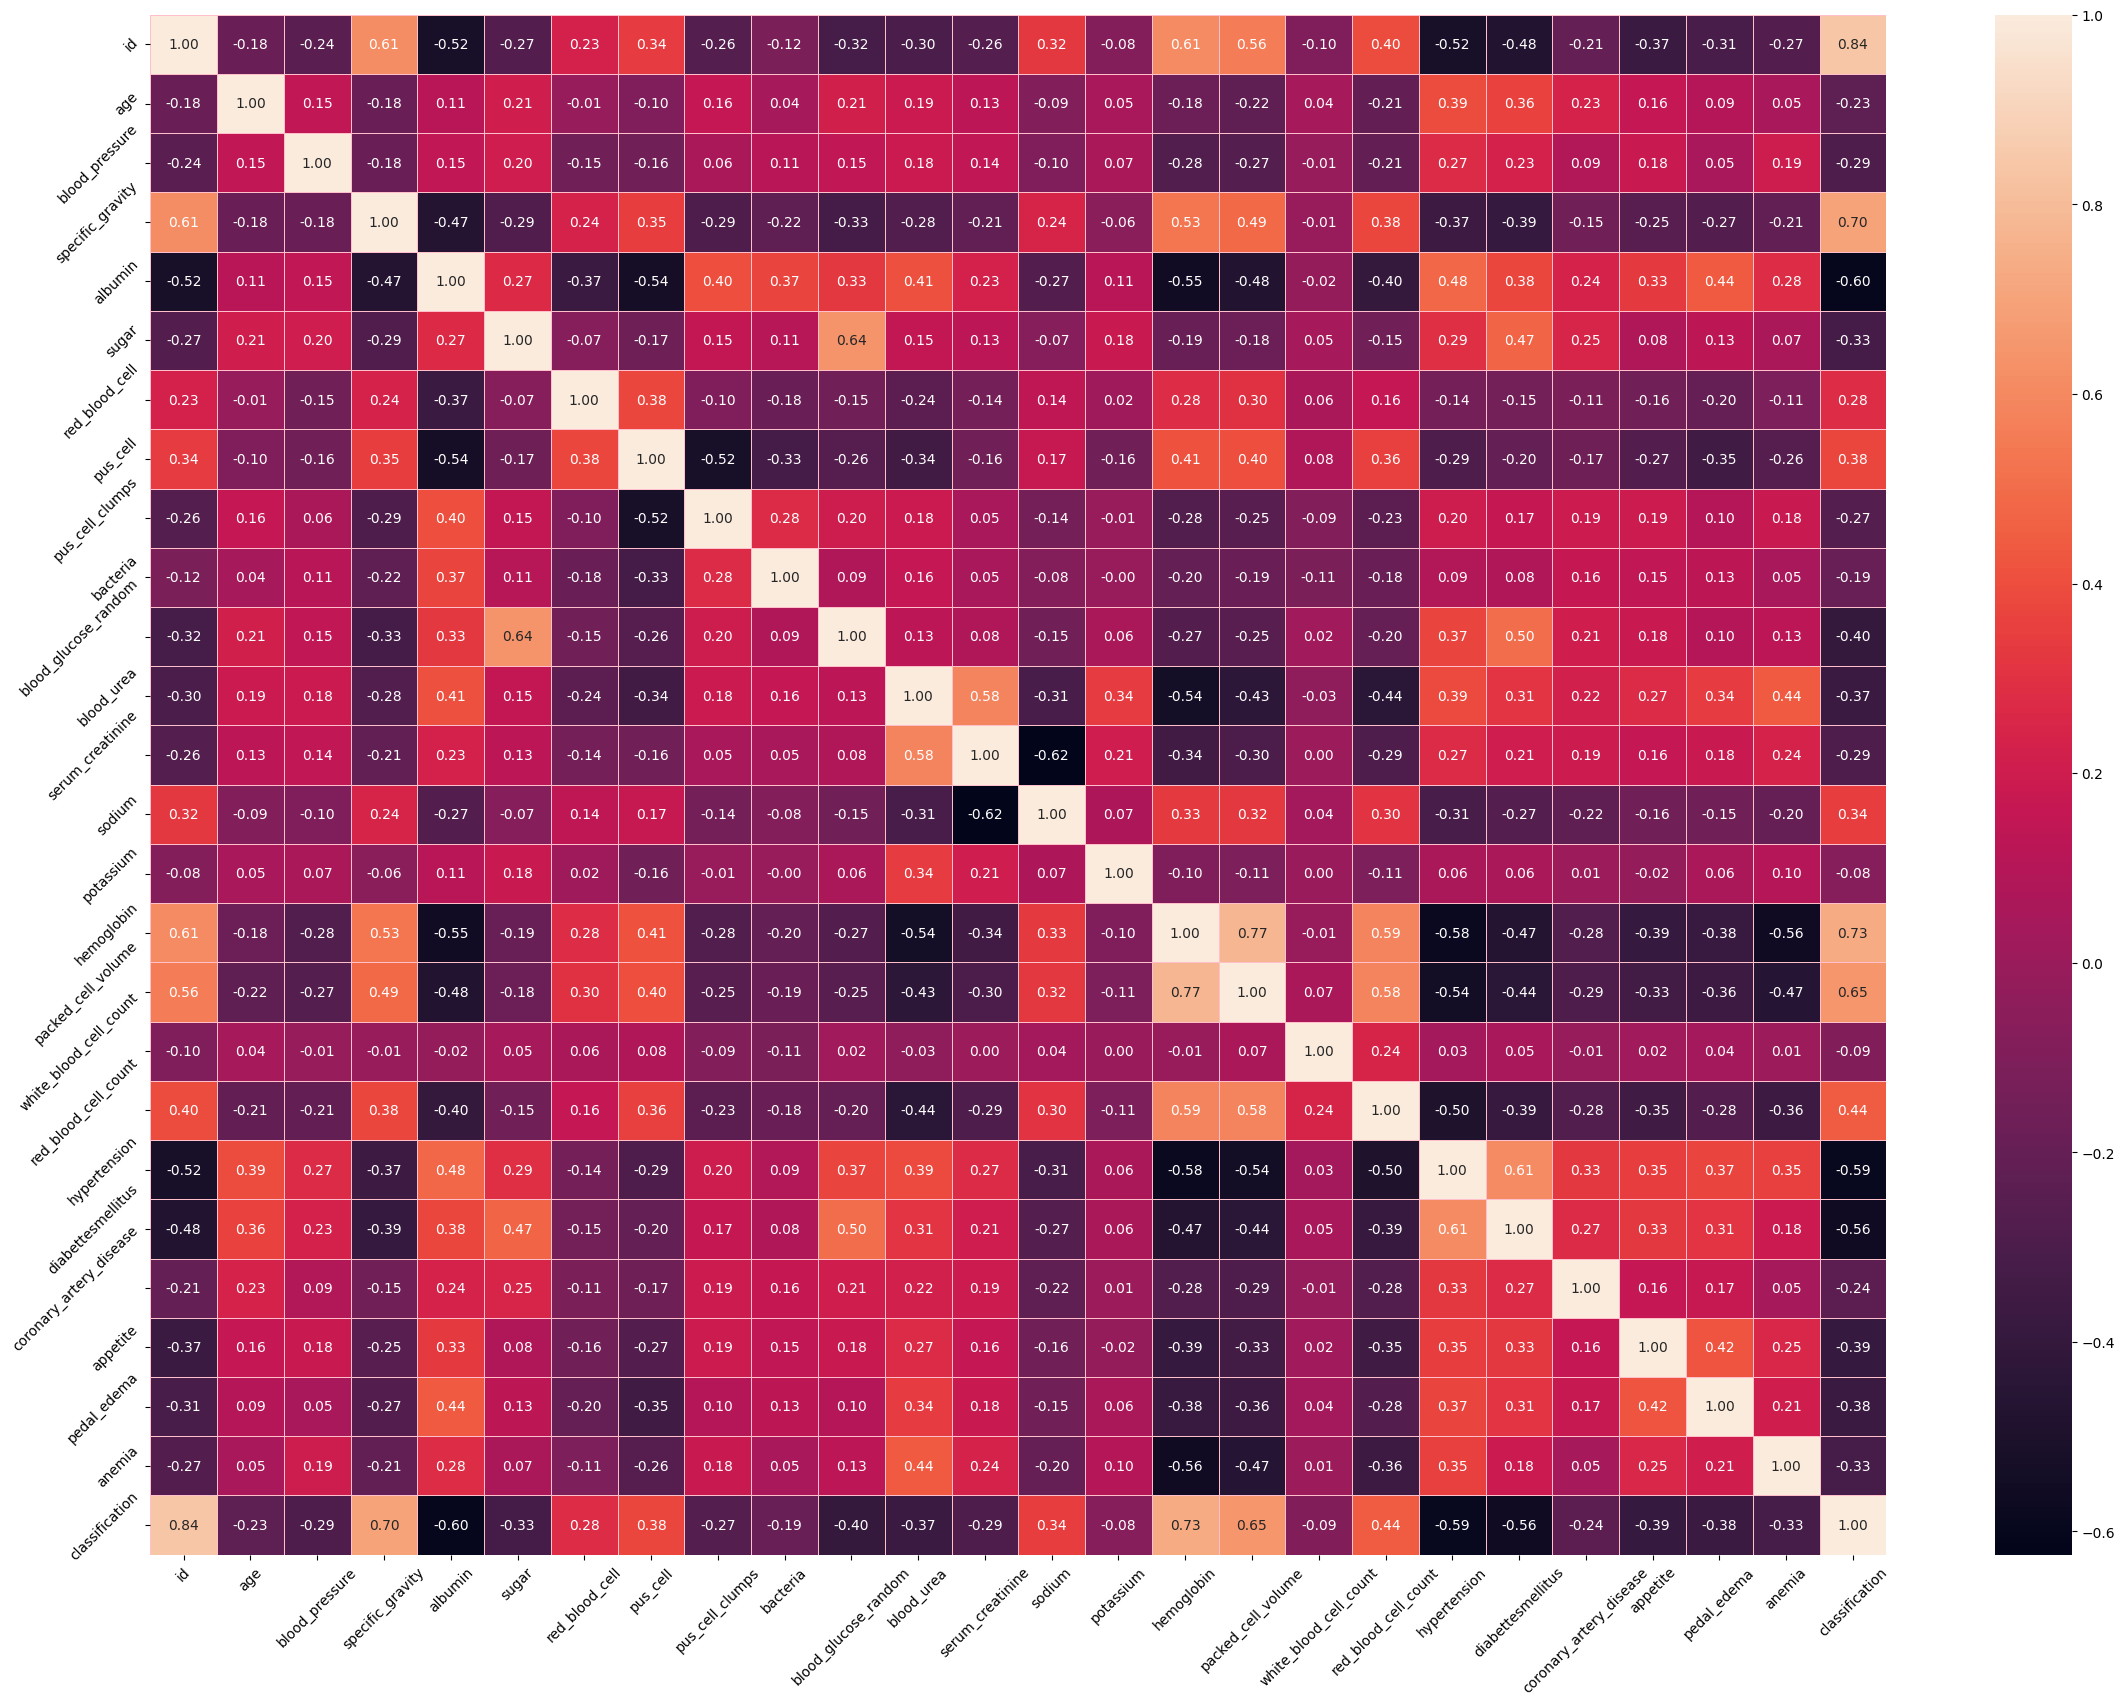

In [ ]:
f,ax=plt.subplots(figsize=(28,20))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.7,linecolor="pink")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: xlabel='classification', ylabel='count'>

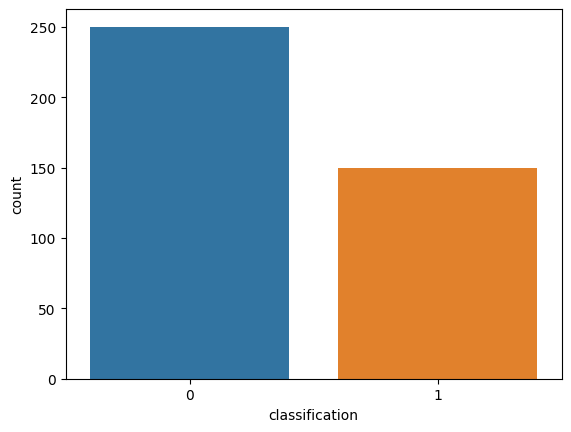

In [ ]:
sns.countplot(x='classification',data=data)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(data)

In [ ]:
selcols=['red_blood_cell','pus_cell','blood_glucose_random','blood_urea','pedal_edema','anemia','diabettesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['classification'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [ ]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2331 - accuracy: 0.8906 - val_loss: 0.3016 - val_accuracy: 0.8906
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.8984 - val_loss: 0.2823 - val_accuracy: 0.9062
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.8906 - val_loss: 0.3599 - val_accuracy: 0.8438
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9102 - val_loss: 0.2745 - val_accuracy: 0.8906
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9297 - val_loss: 0.2955 - val_accuracy: 0.9062
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9141 - val_loss: 0.2764 - val_accuracy: 0.8906
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.8789 - val_loss: 0.2632 - val_accuracy: 0.9062
Epoch 8/100
2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10, criterion='entropy')  

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict = rfc.predict(x_test)

In [ ]:
y_predict_train=rfc.predict(x_train)

In [ ]:
accuracy_score(y_test, y_predict)

0.925

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4, splitter='best',criterion='entropy')

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict=dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
y_predict_train=dtc.predict(x_train)

In [ ]:
accuracy_score(y_test, y_predict)

0.9625

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [ ]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=lgr.predict(x_test)

In [ ]:
y_pred=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[0]


array([0])

In [ ]:
y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[0]


array([0])

In [ ]:
y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[0]


array([0])

In [ ]:
classification.save("ckd.h5")

In [ ]:
y_pred=classification.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[4.90768361e-05],
       [5.83675283e-04],
       [1.63451609e-14],
       [6.08043745e-04],
       [8.80093277e-01],
       [3.04704088e-07],
       [1.14776445e-10],
       [1.20607291e-09],
       [7.49427557e-01],
       [1.04539779e-07],
       [3.59793811e-23],
       [9.36701254e-05],
       [6.40479922e-01],
       [6.85605288e-01],
       [7.65909471e-20],
       [9.07089195e-11],
       [6.60351217e-34],
       [8.22439551e-01],
       [7.41959989e-01],
       [1.26904856e-12],
       [9.04376745e-01],
       [7.25878894e-01],
       [1.00692230e-27],
       [7.16291964e-01],
       [3.35840133e-09],
       [7.68765390e-01],
       [9.15708487e-21],
       [9.47123491e-10],
       [9.13077772e-01],
       [1.67259088e-06],
       [1.97409085e-04],
       [8.11074436e-01],
       [3.00961826e-02],
       [5.85424667e-03],
       [3.71582322e-13],
       [1.92117841e-06],
       [8.98243964e-01],
       [2.66668962e-06],
       [6.67667203e-03],
       [9.16354239e-01],


In [ ]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [ ]:
def predict_exit(sample_value):
  sample_value=np.array(sample_value)
  sample_value=sample_value.reshape(1,-1)
  sample_value=sc.transform(sample_value)
  return classifier.predict(sample_value)

In [ ]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
  print('Prediction: High chance of CKD!')
else:
  print('Prediction: Low chance of CKD. ')

1/1 [==============================] - 0s 68ms/step
Prediction: Low chance of CKD. 


In [ ]:
from sklearn import model_selection
dfs = []
models =[
    ('LogReg', LogisticRegression()), 
    ('RF', RandomForestClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
  
    ]
results = []
names = []
scoring=['accuracy','precision_weighted','recall_weighted', 'roc_auc','f1_weighted']
target_names = ['NO CKD', 'CKD'] 
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final=pd.concat(dfs,ignore_index=True)
print(final)

LogReg
              precision    recall  f1-score   support

      NO CKD       1.00      0.89      0.94        54
         CKD       0.81      1.00      0.90        26

    accuracy                           0.93        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80

RF
              precision    recall  f1-score   support

      NO CKD       0.96      0.96      0.96        54
         CKD       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80

DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.93      0.94      0.94        54
         CKD       0.88      0.85      0.86        26

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[52,  2],
       [ 1, 25]])

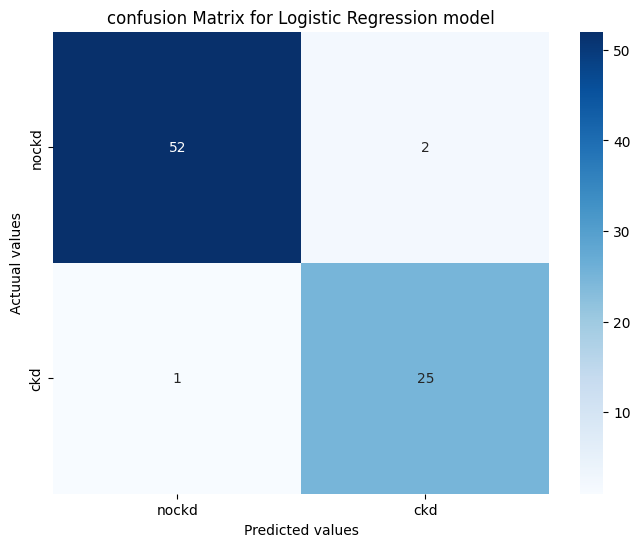

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True, xticklabels=['nockd','ckd'],yticklabels=['nockd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actuual values')
plt.title('confusion Matrix for Logistic Regression model')
plt.show()

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.93      0.96      0.94        26

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[51,  3],
       [ 4, 22]])

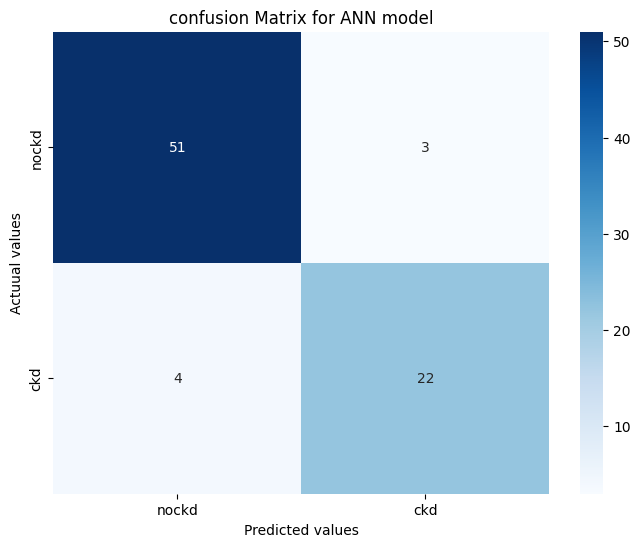

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True, xticklabels=['nockd','ckd'],yticklabels=['nockd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actuual values')
plt.title('confusion Matrix for ANN model')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.88      0.85      0.86        26

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



In [ ]:
bootstraps=[]
for model in list(set(final.model.values)):
  model_df = final.loc[final.model == model] 
  bootstrap = model_df.sample(n=30, replace=True)
  bootstraps.append(bootstrap)
bootstrap_df=pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=["model"],var_name="metrics", value_name="values")
time_metrics=['fit_time','score_time']
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] 
results_long_nofit = results_long_nofit.sort_values(by='values')
results_long_fit=results_long.loc[results_long['metrics'].isin(time_metrics)] 
results_long_fit = results_long_fit.sort_values(by="values")

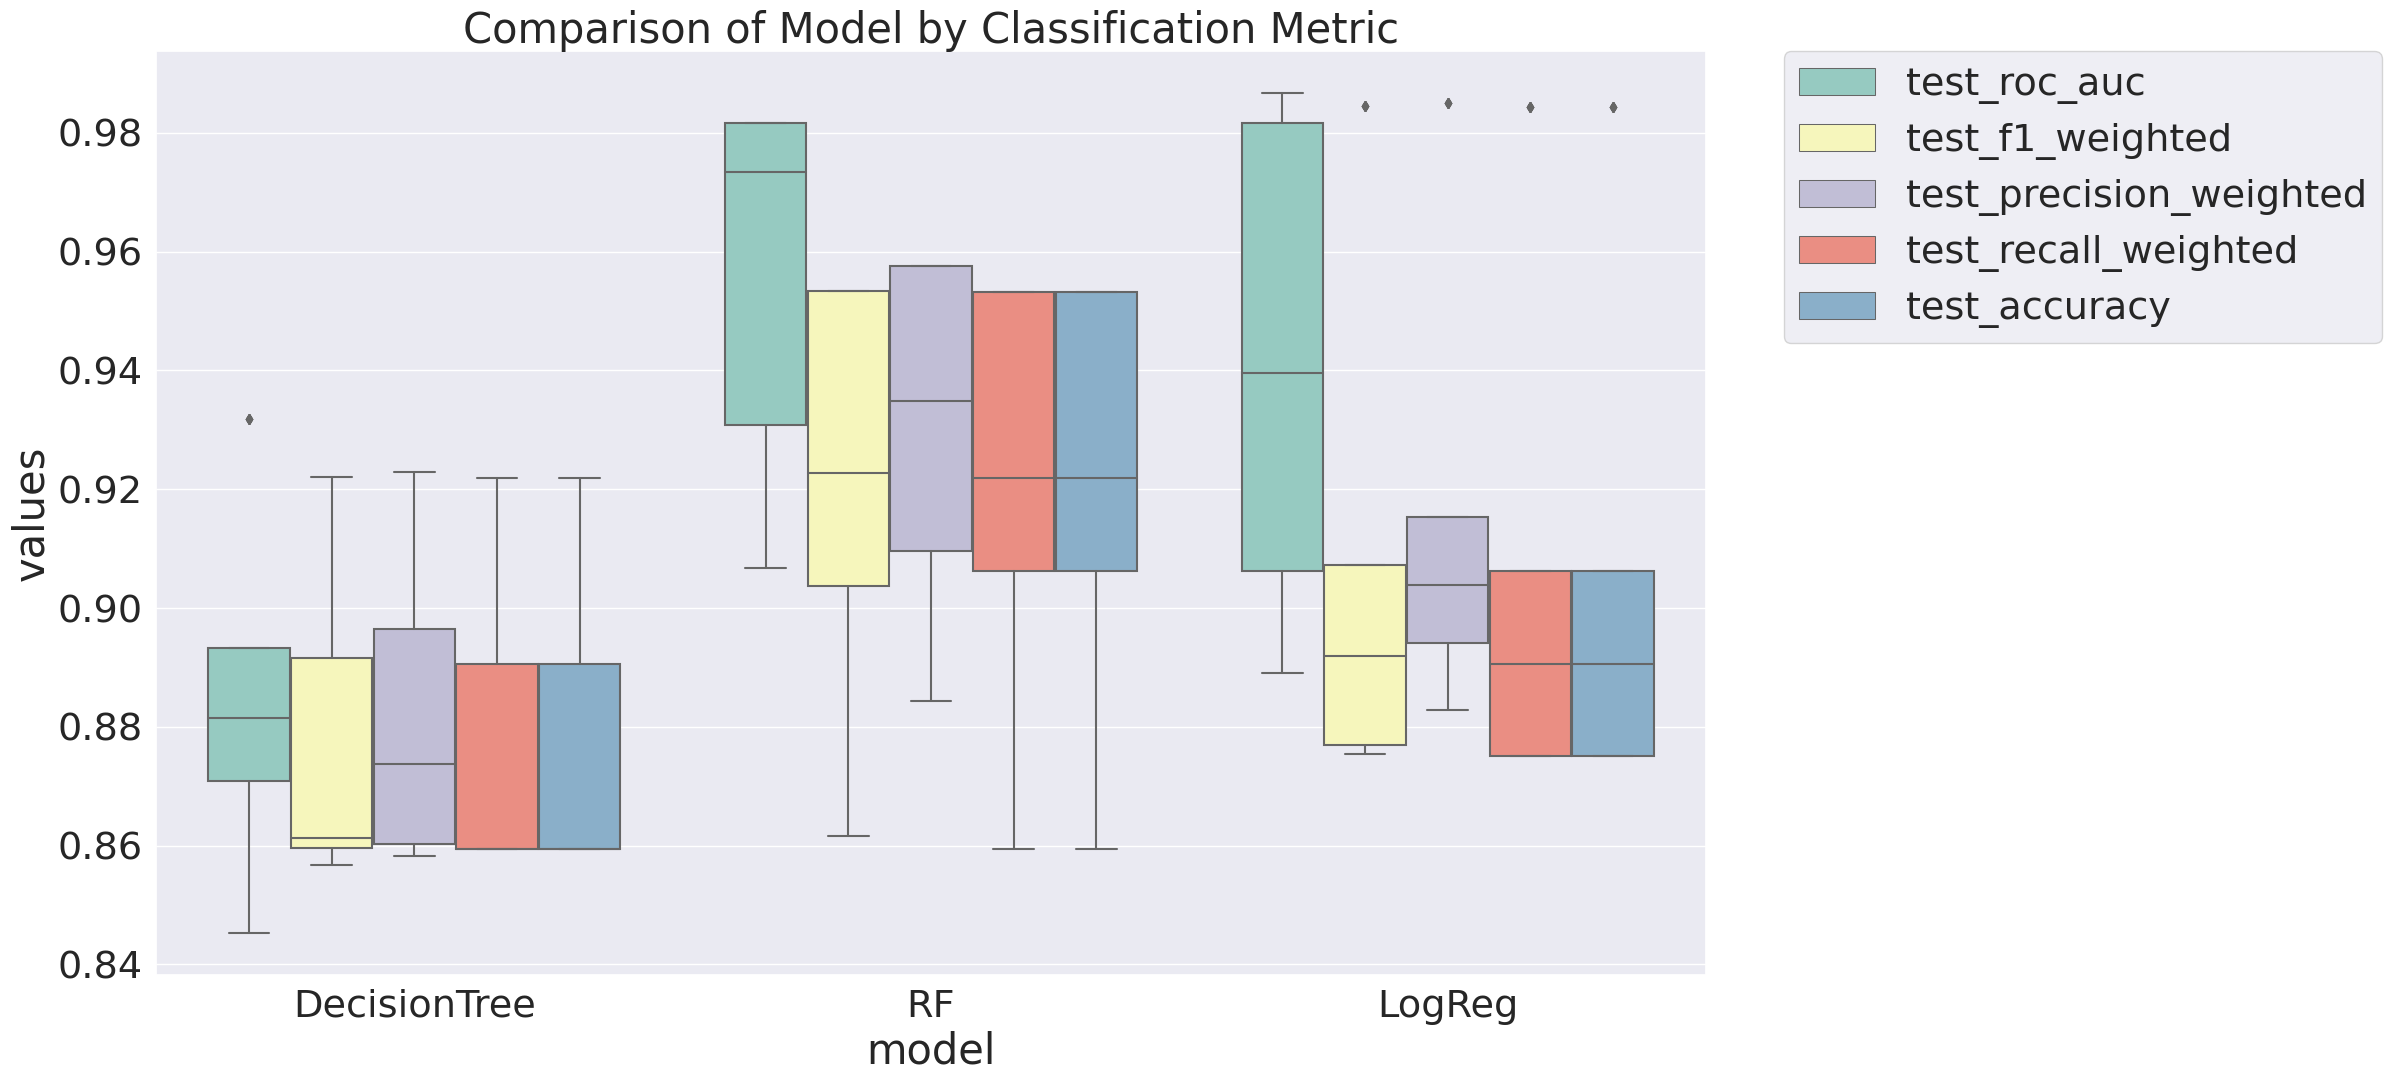

In [ ]:
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g=sns.boxplot(x="model", y="values",hue="metrics",data=results_long_nofit, palette='Set3')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [ ]:
pickle.dump(rfc, open('CKD.pkl','wb'))

In [ ]:
model= pickle.load(open('CKD.pkl','rb'))
model.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])